# **`INSTALLING LIBRARIES`**



In [ ]:
!pip install pandas
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached yfinance-0.1.70-py2.py3-none-any.whl (26 kB)
  Using cached requests-2.27.1-py2.py3-none-any.whl (63 kB)
  Using cached lxml-4.8.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (6.4 MB)
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompat

# **`IMPORTING INITIAL LIBRARIES`**

In [ ]:
import pandas as pd
import numpy as np
import re
import yfinance as yf
import matplotlib.pyplot as plt



# **`READING THE DATA COLLECTED`**

In [ ]:
from google.colab import files
uploaded = files.upload() #Uploading the csv file of data collected

Saving tweets_btc.csv to tweets_btc.csv


In [ ]:
import io
data= pd.read_csv(io.BytesIO(uploaded['tweets_btc.csv']))
data= data.drop('Unnamed: 0',axis=1)
data = data.rename(columns={'time': 'Date'})
data

,tweets,Date,Influencer
0,🚨 SoFi is taking a lucky winner + 3 friends to...,2022-03-24 01:51:24+00:00,Apompliano
1,"People have been hired at Strike, BTC Inc, Anc...",2022-03-19 00:18:00+00:00,Apompliano
2,@BTC__Ninja @cryptojobguy Of course,2022-03-18 17:21:55+00:00,Apompliano
3,Congresswoman Marie Newman just revealed in a ...,2022-02-09 14:54:02+00:00,Apompliano
4,The SEC has just delayed their decision on whe...,2022-02-04 22:38:11+00:00,Apompliano
...,...,...,...
14624,@bitcoinization @future_jon @DeaterBob @hodlon...,28/03/2019 19:43,SatoshiLite
14625,RT @lightning: Announcing the alpha release of...,20/03/2019 18:08,SatoshiLite
14626,RT @flappening: What's this? A completely new ...,09/03/2019 22:55,SatoshiLite
14627,RT @DelRayMan: EXCLUSIVE: Google adds support ...,05/02/2019 09:03,SatoshiLite


# **`DOWNLOADING THE BTC PRICES FROM YAHOO FINANCE`**

In [ ]:
BTC_price = yf.download("BTC-GBP", start="2014-09-17", end="2022-05-01")
BTC_price = BTC_price.reset_index()
BTC_price

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,286.456390,287.523193,278.037109,281.176758,281.176758,12946081
1,2014-09-18,280.885315,281.075409,252.261856,258.426697,258.426697,20995616
2,2014-09-19,258.221497,259.372528,235.115875,242.429230,242.429230,23285048
3,2014-09-20,242.353699,259.929993,239.412338,251.092407,251.092407,22636537
4,2014-09-21,250.589493,253.255142,241.437515,244.570435,244.570435,16299810
...,...,...,...,...,...,...,...
2779,2022-04-27,30298.359375,31356.330078,30215.423828,31293.185547,31293.185547,24706089388
2780,2022-04-28,31293.429688,32336.460938,31335.345703,31908.554688,31908.554688,27199247261
2781,2022-04-29,31904.371094,31917.712891,30413.195312,30724.771484,30724.771484,24575945950
2782,2022-04-30,30721.615234,30835.673828,29982.078125,29995.544922,29995.544922,19004834628


# **`DROP THE UNNECESSARY COLUMNS`**

In [ ]:
BTC_price=BTC_price.drop('Volume',axis=1)
BTC_price=BTC_price.drop('Adj Close',axis=1)
BTC_price=BTC_price.drop('High',axis=1)
BTC_price=BTC_price.drop('Low',axis=1)
BTC_price

,Date,Open,Close
0,2014-09-17,286.456390,281.176758
1,2014-09-18,280.885315,258.426697
2,2014-09-19,258.221497,242.429230
3,2014-09-20,242.353699,251.092407
4,2014-09-21,250.589493,244.570435
...,...,...,...
2779,2022-04-27,30298.359375,31293.185547
2780,2022-04-28,31293.429688,31908.554688
2781,2022-04-29,31904.371094,30724.771484
2782,2022-04-30,30721.615234,29995.544922


# **`CONVERTING THE TYPE OF DATE COLUMN`**

In [ ]:
x=data.Date
x

0        2022-03-24 01:51:24+00:00
1        2022-03-19 00:18:00+00:00
2        2022-03-18 17:21:55+00:00
3        2022-02-09 14:54:02+00:00
4        2022-02-04 22:38:11+00:00
                   ...            
14624             28/03/2019 19:43
14625             20/03/2019 18:08
14626             09/03/2019 22:55
14627             05/02/2019 09:03
14628             28/01/2019 19:27
Name: Date, Length: 14629, dtype: object

In [ ]:
x_li=[]
for i in x:
    x_li.append(i)

x_li

['2022-03-24 01:51:24+00:00',
 '2022-03-19 00:18:00+00:00',
 '2022-03-18 17:21:55+00:00',
 '2022-02-09 14:54:02+00:00',
 '2022-02-04 22:38:11+00:00',
 '2022-01-30 02:28:30+00:00',
 '2022-01-20 16:24:17+00:00',
 '2022-01-19 12:16:22+00:00',
 '2022-01-06 13:23:25+00:00',
 '2022-01-05 16:30:22+00:00',
 '2022-01-05 14:05:01+00:00',
 '2022-01-05 13:52:55+00:00',
 '2022-01-05 13:44:16+00:00',
 '2021-12-28 01:23:21+00:00',
 '2021-12-27 13:20:05+00:00',
 '2021-11-12 14:15:59+00:00',
 '2021-11-12 03:28:42+00:00',
 '2021-11-12 03:21:30+00:00',
 '2021-11-12 01:49:03+00:00',
 '2022-01-11 03:08:40+00:00',
 '2021-12-21 00:14:25+00:00',
 '2022-03-29 13:48:53+00:00',
 '2022-03-28 22:53:21+00:00',
 '2022-03-28 13:24:53+00:00',
 '2022-03-27 21:12:12+00:00',
 '2022-03-27 21:08:26+00:00',
 '2022-03-27 20:46:04+00:00',
 '2022-03-26 15:26:21+00:00',
 '2022-03-25 15:50:53+00:00',
 '2022-03-25 12:39:52+00:00',
 '2022-03-25 12:30:33+00:00',
 '2022-03-25 12:21:39+00:00',
 '2022-03-24 17:56:18+00:00',
 '2022-03-

In [ ]:
x_sp=[]
for j in x_li:
    y=j.split()
    x_sp.append(y[0])
x_sp


['2022-03-24',
 '2022-03-19',
 '2022-03-18',
 '2022-02-09',
 '2022-02-04',
 '2022-01-30',
 '2022-01-20',
 '2022-01-19',
 '2022-01-06',
 '2022-01-05',
 '2022-01-05',
 '2022-01-05',
 '2022-01-05',
 '2021-12-28',
 '2021-12-27',
 '2021-11-12',
 '2021-11-12',
 '2021-11-12',
 '2021-11-12',
 '2022-01-11',
 '2021-12-21',
 '2022-03-29',
 '2022-03-28',
 '2022-03-28',
 '2022-03-27',
 '2022-03-27',
 '2022-03-27',
 '2022-03-26',
 '2022-03-25',
 '2022-03-25',
 '2022-03-25',
 '2022-03-25',
 '2022-03-24',
 '2022-03-24',
 '2022-03-24',
 '2022-03-24',
 '2022-03-24',
 '2022-03-23',
 '2022-03-23',
 '2022-03-23',
 '2022-03-22',
 '2022-03-22',
 '2022-03-21',
 '2022-03-21',
 '2022-03-21',
 '2022-03-19',
 '2022-03-18',
 '2022-03-18',
 '2022-03-16',
 '2022-03-16',
 '2022-03-16',
 '2022-03-16',
 '2022-03-16',
 '2022-03-16',
 '2022-03-16',
 '2022-03-16',
 '2022-03-15',
 '2022-03-15',
 '2022-03-14',
 '2022-03-13',
 '2022-03-12',
 '2022-03-11',
 '2022-03-10',
 '2022-03-10',
 '2022-03-10',
 '2022-03-10',
 '2022-03-

In [ ]:
data_new=data
data_new=data_new.drop('Date', axis=1)
data_new['Date']=x_sp
data_new

,tweets,Influencer,Date
0,🚨 SoFi is taking a lucky winner + 3 friends to...,Apompliano,2022-03-24
1,"People have been hired at Strike, BTC Inc, Anc...",Apompliano,2022-03-19
2,@BTC__Ninja @cryptojobguy Of course,Apompliano,2022-03-18
3,Congresswoman Marie Newman just revealed in a ...,Apompliano,2022-02-09
4,The SEC has just delayed their decision on whe...,Apompliano,2022-02-04
...,...,...,...
14624,@bitcoinization @future_jon @DeaterBob @hodlon...,SatoshiLite,28/03/2019
14625,RT @lightning: Announcing the alpha release of...,SatoshiLite,20/03/2019
14626,RT @flappening: What's this? A completely new ...,SatoshiLite,09/03/2019
14627,RT @DelRayMan: EXCLUSIVE: Google adds support ...,SatoshiLite,05/02/2019


In [ ]:
data_new.Date
data_new['Date'] = pd.to_datetime(data_new.Date)
BTC_price['Date'] = pd.to_datetime(BTC_price.Date)

# **`MERGING THE TWO DATASETS (TWEETS AND BTC PRICES) USING JOINS ON DATE COLUMN`**

In [ ]:
df_sort=pd.merge(data_new,BTC_price, how='outer', on='Date')
df_sort

,tweets,Influencer,Date,Open,Close
0,🚨 SoFi is taking a lucky winner + 3 friends to...,Apompliano,2022-03-24,32476.046875,33318.210938
1,@jackmallers @BitcoinMagazine @TheBitcoinConf ...,Apompliano,2022-03-24,32476.046875,33318.210938
2,"Exxon Mobil, one of the largest energy compani...",Apompliano,2022-03-24,32476.046875,33318.210938
3,Oil and natural gas industry is going to usher...,Apompliano,2022-03-24,32476.046875,33318.210938
4,"RT @BitcoinNDaily: ""It just feels like there i...",Apompliano,2022-03-24,32476.046875,33318.210938
...,...,...,...,...,...
15464,NaN,NaN,2022-04-08,33288.609375,32440.642578
15465,NaN,NaN,2022-04-09,32436.359375,32819.972656
15466,NaN,NaN,2022-04-10,32819.171875,32392.699219
15467,NaN,NaN,2022-04-11,32387.609375,30348.117188


In [ ]:
df_sort.isnull().sum()

tweets         840
Influencer     840
Date             0
Open          1306
Close         1306
dtype: int64

In [ ]:
df_sort=df_sort.dropna()
data_c=df_sort
data_c

,tweets,Influencer,Date,Open,Close
0,🚨 SoFi is taking a lucky winner + 3 friends to...,Apompliano,2022-03-24,32476.046875,33318.210938
1,@jackmallers @BitcoinMagazine @TheBitcoinConf ...,Apompliano,2022-03-24,32476.046875,33318.210938
2,"Exxon Mobil, one of the largest energy compani...",Apompliano,2022-03-24,32476.046875,33318.210938
3,Oil and natural gas industry is going to usher...,Apompliano,2022-03-24,32476.046875,33318.210938
4,"RT @BitcoinNDaily: ""It just feels like there i...",Apompliano,2022-03-24,32476.046875,33318.210938
...,...,...,...,...,...
14624,RT @jack: Cool example of #BitcoinTwitter expe...,SatoshiLite,2019-05-02,4138.833984,4224.259277
14625,RT @DelRayMan: EXCLUSIVE: Google adds support ...,SatoshiLite,2019-05-02,4138.833984,4224.259277
14626,Fungibility is the only property of sound mone...,SatoshiLite,2019-01-28,2713.703857,2637.278564
14627,RT @AlonGoren: It's all about adoption! So exc...,SatoshiLite,2019-01-28,2713.703857,2637.278564


In [ ]:
data_c = data_c.reset_index()
data_c


,index,tweets,Influencer,Date,Open,Close
0,0,🚨 SoFi is taking a lucky winner + 3 friends to...,Apompliano,2022-03-24,32476.046875,33318.210938
1,1,@jackmallers @BitcoinMagazine @TheBitcoinConf ...,Apompliano,2022-03-24,32476.046875,33318.210938
2,2,"Exxon Mobil, one of the largest energy compani...",Apompliano,2022-03-24,32476.046875,33318.210938
3,3,Oil and natural gas industry is going to usher...,Apompliano,2022-03-24,32476.046875,33318.210938
4,4,"RT @BitcoinNDaily: ""It just feels like there i...",Apompliano,2022-03-24,32476.046875,33318.210938
...,...,...,...,...,...,...
13318,14624,RT @jack: Cool example of #BitcoinTwitter expe...,SatoshiLite,2019-05-02,4138.833984,4224.259277
13319,14625,RT @DelRayMan: EXCLUSIVE: Google adds support ...,SatoshiLite,2019-05-02,4138.833984,4224.259277
13320,14626,Fungibility is the only property of sound mone...,SatoshiLite,2019-01-28,2713.703857,2637.278564
13321,14627,RT @AlonGoren: It's all about adoption! So exc...,SatoshiLite,2019-01-28,2713.703857,2637.278564


In [ ]:
data_c=data_c.drop('index', axis=1)


In [ ]:
data_c

,tweets,Influencer,Date,Open,Close
0,🚨 SoFi is taking a lucky winner + 3 friends to...,Apompliano,2022-03-24,32476.046875,33318.210938
1,@jackmallers @BitcoinMagazine @TheBitcoinConf ...,Apompliano,2022-03-24,32476.046875,33318.210938
2,"Exxon Mobil, one of the largest energy compani...",Apompliano,2022-03-24,32476.046875,33318.210938
3,Oil and natural gas industry is going to usher...,Apompliano,2022-03-24,32476.046875,33318.210938
4,"RT @BitcoinNDaily: ""It just feels like there i...",Apompliano,2022-03-24,32476.046875,33318.210938
...,...,...,...,...,...
13318,RT @jack: Cool example of #BitcoinTwitter expe...,SatoshiLite,2019-05-02,4138.833984,4224.259277
13319,RT @DelRayMan: EXCLUSIVE: Google adds support ...,SatoshiLite,2019-05-02,4138.833984,4224.259277
13320,Fungibility is the only property of sound mone...,SatoshiLite,2019-01-28,2713.703857,2637.278564
13321,RT @AlonGoren: It's all about adoption! So exc...,SatoshiLite,2019-01-28,2713.703857,2637.278564


In [ ]:
a=data_c.Open
b=data_c.Close
Price_change=b-a
Price_change #Difference between the open and close price

0        842.164062
1        842.164062
2        842.164062
3        842.164062
4        842.164062
            ...    
13318     85.425293
13319     85.425293
13320    -76.425293
13321    -76.425293
13322    131.072266
Length: 13323, dtype: float64

# **`ADDITION OF NEW COLUMNS BY FEATURE ENGINEERING`**

In [ ]:
data_c['Price']= Price_change
#data_c['Price'] = data_c['Price'].apply(np.int64)
data_c

,tweets,Influencer,Date,Open,Close,Price
0,🚨 SoFi is taking a lucky winner + 3 friends to...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062
1,@jackmallers @BitcoinMagazine @TheBitcoinConf ...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062
2,"Exxon Mobil, one of the largest energy compani...",Apompliano,2022-03-24,32476.046875,33318.210938,842.164062
3,Oil and natural gas industry is going to usher...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062
4,"RT @BitcoinNDaily: ""It just feels like there i...",Apompliano,2022-03-24,32476.046875,33318.210938,842.164062
...,...,...,...,...,...,...
13318,RT @jack: Cool example of #BitcoinTwitter expe...,SatoshiLite,2019-05-02,4138.833984,4224.259277,85.425293
13319,RT @DelRayMan: EXCLUSIVE: Google adds support ...,SatoshiLite,2019-05-02,4138.833984,4224.259277,85.425293
13320,Fungibility is the only property of sound mone...,SatoshiLite,2019-01-28,2713.703857,2637.278564,-76.425293
13321,RT @AlonGoren: It's all about adoption! So exc...,SatoshiLite,2019-01-28,2713.703857,2637.278564,-76.425293


In [ ]:
sent_price=[]
x_s=''
count=0
for i in Price_change:
  if (i < -20): #Considering minimum of "20" to be price change 
    x_s='low'
    sent_price.append(x_s)
  elif(i>20):
    x_s='high'
    sent_price.append(x_s)
  else:
    x_s='nc'
    sent_price.append(x_s)
    count=count+1
len(sent_price)
print(count)
data_c['sent_price']=sent_price
data_c

1667


,tweets,Influencer,Date,Open,Close,Price,sent_price
0,🚨 SoFi is taking a lucky winner + 3 friends to...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high
1,@jackmallers @BitcoinMagazine @TheBitcoinConf ...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high
2,"Exxon Mobil, one of the largest energy compani...",Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high
3,Oil and natural gas industry is going to usher...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high
4,"RT @BitcoinNDaily: ""It just feels like there i...",Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high
...,...,...,...,...,...,...,...
13318,RT @jack: Cool example of #BitcoinTwitter expe...,SatoshiLite,2019-05-02,4138.833984,4224.259277,85.425293,high
13319,RT @DelRayMan: EXCLUSIVE: Google adds support ...,SatoshiLite,2019-05-02,4138.833984,4224.259277,85.425293,high
13320,Fungibility is the only property of sound mone...,SatoshiLite,2019-01-28,2713.703857,2637.278564,-76.425293,low
13321,RT @AlonGoren: It's all about adoption! So exc...,SatoshiLite,2019-01-28,2713.703857,2637.278564,-76.425293,low


# **`REMOVAL OF UNWANTED SYMBOLS USING REGULAR EXPRRESSIONS`**

In [ ]:
def cleantxt(text):
    text= re.sub(r'#','',text)
    text= re.sub(r'@','',text)
    text= re.sub(r'https?:\/\/\S+','',text)
    text= re.sub(r'amp','',text)
    text= re.sub(r'RT','',text)
    

    return text

cleaned_tweets=data_c['tweets'].apply(cleantxt)
data_c['cleaned_tweets']=cleaned_tweets
data_c

,tweets,Influencer,Date,Open,Close,Price,sent_price,cleaned_tweets
0,🚨 SoFi is taking a lucky winner + 3 friends to...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,🚨 SoFi is taking a lucky winner + 3 friends to...
1,@jackmallers @BitcoinMagazine @TheBitcoinConf ...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,jackmallers BitcoinMagazine TheBitcoinConf Cha...
2,"Exxon Mobil, one of the largest energy compani...",Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,"Exxon Mobil, one of the largest energy compani..."
3,Oil and natural gas industry is going to usher...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,Oil and natural gas industry is going to usher...
4,"RT @BitcoinNDaily: ""It just feels like there i...",Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,"BitcoinNDaily: ""It just feels like there is a..."
...,...,...,...,...,...,...,...,...
13318,RT @jack: Cool example of #BitcoinTwitter expe...,SatoshiLite,2019-05-02,4138.833984,4224.259277,85.425293,high,jack: Cool exle of BitcoinTwitter experimenti...
13319,RT @DelRayMan: EXCLUSIVE: Google adds support ...,SatoshiLite,2019-05-02,4138.833984,4224.259277,85.425293,high,DelRayMan: EXCLUSIVE: Google adds support for...
13320,Fungibility is the only property of sound mone...,SatoshiLite,2019-01-28,2713.703857,2637.278564,-76.425293,low,Fungibility is the only property of sound mone...
13321,RT @AlonGoren: It's all about adoption! So exc...,SatoshiLite,2019-01-28,2713.703857,2637.278564,-76.425293,low,AlonGoren: It's all about adoption! So excite...


# **`FINDING SUBJECTIVITY AND POLARITY OF TWEETS`**

In [ ]:
from textblob import TextBlob

def getSubjectivity(text): #function for finding subjectivity
   return TextBlob(text).sentiment.subjectivity


def getPolarity(text): #function for finding polarity
   return  TextBlob(text).sentiment.polarity


# Creating new columns Subjectivity & Polarity
data_c['Subjectivity'] = data_c['cleaned_tweets'].apply(getSubjectivity)
data_c['Polarity'] = data_c['cleaned_tweets'].apply(getPolarity)

# new dataframe with columns 'Subjectivity' & 'Polarity'
data_c

,tweets,Influencer,Date,Open,Close,Price,sent_price,cleaned_tweets,Subjectivity,Polarity
0,🚨 SoFi is taking a lucky winner + 3 friends to...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,🚨 SoFi is taking a lucky winner + 3 friends to...,0.544444,0.711111
1,@jackmallers @BitcoinMagazine @TheBitcoinConf ...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,jackmallers BitcoinMagazine TheBitcoinConf Cha...,0.000000,0.000000
2,"Exxon Mobil, one of the largest energy compani...",Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,"Exxon Mobil, one of the largest energy compani...",0.700000,0.050000
3,Oil and natural gas industry is going to usher...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,Oil and natural gas industry is going to usher...,0.133333,0.033333
4,"RT @BitcoinNDaily: ""It just feels like there i...",Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,"BitcoinNDaily: ""It just feels like there is a...",0.800000,0.000000
...,...,...,...,...,...,...,...,...,...,...
13318,RT @jack: Cool example of #BitcoinTwitter expe...,SatoshiLite,2019-05-02,4138.833984,4224.259277,85.425293,high,jack: Cool exle of BitcoinTwitter experimenti...,0.650000,0.437500
13319,RT @DelRayMan: EXCLUSIVE: Google adds support ...,SatoshiLite,2019-05-02,4138.833984,4224.259277,85.425293,high,DelRayMan: EXCLUSIVE: Google adds support for...,0.166667,0.166667
13320,Fungibility is the only property of sound mone...,SatoshiLite,2019-01-28,2713.703857,2637.278564,-76.425293,low,Fungibility is the only property of sound mone...,0.441667,0.050000
13321,RT @AlonGoren: It's all about adoption! So exc...,SatoshiLite,2019-01-28,2713.703857,2637.278564,-76.425293,low,AlonGoren: It's all about adoption! So excite...,0.750000,0.375000


# **`FINDING SENTIMENT BASED ON POLARITY`**

In [ ]:
def getAnalysis(score):
  if score <0:
    return 'negative'
  elif score==0:
    return 'neutral'
  else: 
    return 'positive'
data_c['sentiment'] = data_c['Polarity'].apply(getAnalysis)
data_c

,tweets,Influencer,Date,Open,Close,Price,sent_price,cleaned_tweets,Subjectivity,Polarity,sentiment
0,🚨 SoFi is taking a lucky winner + 3 friends to...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,🚨 SoFi is taking a lucky winner + 3 friends to...,0.544444,0.711111,positive
1,@jackmallers @BitcoinMagazine @TheBitcoinConf ...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,jackmallers BitcoinMagazine TheBitcoinConf Cha...,0.000000,0.000000,neutral
2,"Exxon Mobil, one of the largest energy compani...",Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,"Exxon Mobil, one of the largest energy compani...",0.700000,0.050000,positive
3,Oil and natural gas industry is going to usher...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,Oil and natural gas industry is going to usher...,0.133333,0.033333,positive
4,"RT @BitcoinNDaily: ""It just feels like there i...",Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,"BitcoinNDaily: ""It just feels like there is a...",0.800000,0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...,...
13318,RT @jack: Cool example of #BitcoinTwitter expe...,SatoshiLite,2019-05-02,4138.833984,4224.259277,85.425293,high,jack: Cool exle of BitcoinTwitter experimenti...,0.650000,0.437500,positive
13319,RT @DelRayMan: EXCLUSIVE: Google adds support ...,SatoshiLite,2019-05-02,4138.833984,4224.259277,85.425293,high,DelRayMan: EXCLUSIVE: Google adds support for...,0.166667,0.166667,positive
13320,Fungibility is the only property of sound mone...,SatoshiLite,2019-01-28,2713.703857,2637.278564,-76.425293,low,Fungibility is the only property of sound mone...,0.441667,0.050000,positive
13321,RT @AlonGoren: It's all about adoption! So exc...,SatoshiLite,2019-01-28,2713.703857,2637.278564,-76.425293,low,AlonGoren: It's all about adoption! So excite...,0.750000,0.375000,positive


In [ ]:
type(data_c.sent_price[1])

str

In [ ]:
data_c

,tweets,Influencer,Date,Open,Close,Price,sent_price,cleaned_tweets,Subjectivity,Polarity,sentiment
0,🚨 SoFi is taking a lucky winner + 3 friends to...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,🚨 SoFi is taking a lucky winner + 3 friends to...,0.544444,0.711111,positive
1,@jackmallers @BitcoinMagazine @TheBitcoinConf ...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,jackmallers BitcoinMagazine TheBitcoinConf Cha...,0.000000,0.000000,neutral
2,"Exxon Mobil, one of the largest energy compani...",Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,"Exxon Mobil, one of the largest energy compani...",0.700000,0.050000,positive
3,Oil and natural gas industry is going to usher...,Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,Oil and natural gas industry is going to usher...,0.133333,0.033333,positive
4,"RT @BitcoinNDaily: ""It just feels like there i...",Apompliano,2022-03-24,32476.046875,33318.210938,842.164062,high,"BitcoinNDaily: ""It just feels like there is a...",0.800000,0.000000,neutral
...,...,...,...,...,...,...,...,...,...,...,...
13318,RT @jack: Cool example of #BitcoinTwitter expe...,SatoshiLite,2019-05-02,4138.833984,4224.259277,85.425293,high,jack: Cool exle of BitcoinTwitter experimenti...,0.650000,0.437500,positive
13319,RT @DelRayMan: EXCLUSIVE: Google adds support ...,SatoshiLite,2019-05-02,4138.833984,4224.259277,85.425293,high,DelRayMan: EXCLUSIVE: Google adds support for...,0.166667,0.166667,positive
13320,Fungibility is the only property of sound mone...,SatoshiLite,2019-01-28,2713.703857,2637.278564,-76.425293,low,Fungibility is the only property of sound mone...,0.441667,0.050000,positive
13321,RT @AlonGoren: It's all about adoption! So exc...,SatoshiLite,2019-01-28,2713.703857,2637.278564,-76.425293,low,AlonGoren: It's all about adoption! So excite...,0.750000,0.375000,positive


# **`VISUALISATION OF SENTIMENT OF TWEETS`**

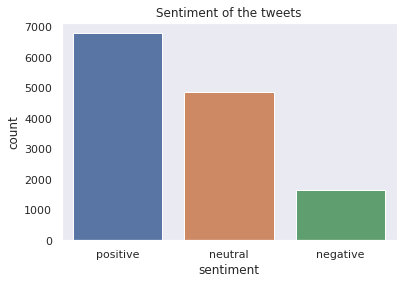

In [ ]:
import seaborn as sns
sns.set(style="dark")
b = sns.countplot(x='sentiment',data = data_c.drop(['cleaned_tweets'], axis=1).astype(str))
b.axes.set_title('Sentiment of the tweets')
plt.show()

In [ ]:
data_c.to_csv('visual_data.csv')


In [ ]:
from google.colab import files
files.download("visual_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
hi=0
lo=0
ne=0
for i in data_c.sent_price:
  if i=="high":
    hi=hi+1
  elif i=="low":
    lo=lo+1
  elif(i=="nc"):
    ne=ne+1
print(hi, lo, ne)

6425 5231 1667


# **`VISUAL REPRESENTATION OF COMMON WORDS IN THE DATA`**

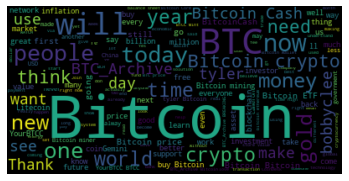

In [ ]:
import matplotlib.pyplot as plt
import wordcloud
common_words=''
for i in data_c.cleaned_tweets:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13323 entries, 0 to 13322
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   tweets          13323 non-null  object        
 1   Influencer      13323 non-null  object        
 2   Date            13323 non-null  datetime64[ns]
 3   Open            13323 non-null  float64       
 4   Close           13323 non-null  float64       
 5   Price           13323 non-null  float64       
 6   sent_price      13323 non-null  object        
 7   cleaned_tweets  13323 non-null  object        
 8   Subjectivity    13323 non-null  float64       
 9   Polarity        13323 non-null  float64       
 10  sentiment       13323 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 1.1+ MB


In [ ]:
data_s = data_c[['cleaned_tweets', 'sentiment', 'sent_price']]
data_s['cleaned_tweets'] = data_s['cleaned_tweets'].apply(lambda x: x.lower())
data_s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cleaned_tweets,sentiment,sent_price
0,🚨 sofi is taking a lucky winner + 3 friends to...,positive,high
1,jackmallers bitcoinmagazine thebitcoinconf cha...,neutral,high
2,"exxon mobil, one of the largest energy compani...",positive,high
3,oil and natural gas industry is going to usher...,positive,high
4,"bitcoinndaily: ""it just feels like there is a...",neutral,high
...,...,...,...
13318,jack: cool exle of bitcointwitter experimenti...,positive,high
13319,delrayman: exclusive: google adds support for...,positive,high
13320,fungibility is the only property of sound mone...,positive,low
13321,alongoren: it's all about adoption! so excite...,positive,low


In [ ]:
for idx,row in data_s.iterrows():
    row[0] = row[0].replace('rt','')
data_s

,cleaned_tweets,sentiment,sent_price
0,🚨 sofi is taking a lucky winner + 3 friends to...,positive,high
1,jackmallers bitcoinmagazine thebitcoinconf cha...,neutral,high
2,"exxon mobil, one of the largest energy compani...",positive,high
3,oil and natural gas industry is going to usher...,positive,high
4,"bitcoinndaily: ""it just feels like there is a...",neutral,high
...,...,...,...
13318,jack: cool exle of bitcointwitter experimenti...,positive,high
13319,delrayman: exclusive: google adds suppo for b...,positive,high
13320,fungibility is the only propey of sound money ...,positive,low
13321,alongoren: it's all about adoption! so excite...,positive,low


In [ ]:
for idx,row in data_s.iterrows():
    row[0] = row[0].replace('','')
data_s

,cleaned_tweets,sentiment,sent_price
0,🚨 sofi is taking a lucky winner + 3 friends to...,positive,high
1,jackmallers bitcoinmagazine thebitcoinconf cha...,neutral,high
2,"exxon mobil, one of the largest energy compani...",positive,high
3,oil and natural gas industry is going to usher...,positive,high
4,"bitcoinndaily: ""it just feels like there is a...",neutral,high
...,...,...,...
13318,jack: cool exle of bitcointwitter experimenti...,positive,high
13319,delrayman: exclusive: google adds suppo for b...,positive,high
13320,fungibility is the only propey of sound money ...,positive,low
13321,alongoren: it's all about adoption! so excite...,positive,low


# **`IMPORTING LIBRARIES FOR MODEL BUILDING`**

In [ ]:
#!pip install tensorflow
!pip install h5py
from keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, Embedding
                        
from keras.layers import Bidirectional

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **`TOKENIZATION OF TWEETS`**

In [ ]:
tokenizer = Tokenizer(num_words=20000, split=" ")
tokenizer.fit_on_texts(data_s['cleaned_tweets'].values)

X = tokenizer.texts_to_sequences(data_s['cleaned_tweets'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X

array([[    0,     0,     0, ...,  1090,     2,  1635],
       [    0,     0,     0, ...,  5050,  1214,  2827],
       [    0,     0,     0, ...,     1,     4,  1181],
       ...,
       [    0,     0,     0, ...,  5778,   315,   364],
       [    0,     0,     0, ...,    96, 18664, 18665],
       [    0,     0,     0, ...,     2,   330, 18667]], dtype=int32)

# **`ONE-HOT ENCODING OF SENTIMENT COLUMN`**

In [ ]:
Y = pd.get_dummies(data_s['sentiment']).values
[print(data_s['sentiment'][i], Y[i]) for i in range(0,5)]
Y

positive [0 0 1]
neutral [0 1 0]
positive [0 0 1]
positive [0 0 1]
neutral [0 1 0]


array([[0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 1, 0]], dtype=uint8)

# **`SPLITTING THE DATA FOR TRAIN AND TEST`**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(9326, 69) (9326, 3)
(3997, 69) (3997, 3)


In [ ]:
X_train[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,   624,     6,   131,
        3793,  5694,     9,    35,     5,    11,     1,  1689,     4,
          97,     6,  2628,   219,  2527,    13,    19,   214, 10852,
           8,    95,     4,    13,   164,   647,  7629,     2,  1052,
        1218,   130,  4629,   257,   397,   493,   250,    11,     2,
         559,     8,    40,    67,   288,  1423], dtype=int32)

In [ ]:
 from keras.callbacks import ModelCheckpoint
check = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

# **LSTM MODEL BUILDING**

In [ ]:
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(3, activation='relu'))
model.compile(loss = 'mean_squared_error', optimizer='adamax',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 66, 256)           1280000   
                                                                 
 dropout_3 (Dropout)         (None, 66, 256)           0         
                                                                 
 lstm_7 (LSTM)               (None, 66, 256)           525312    
                                                                 
 lstm_8 (LSTM)               (None, 256)               525312    
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 2,331,395
Trainable params: 2,331,395
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=8)

In [ ]:
Y_train.shape

(9326, 3)

# **`MODEL TRAINING(TWEETS VS SENTIMENT)`**

In [ ]:

train_model=model.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs = 100, batch_size= 64, callbacks=[es])

Epoch 1/100
146/146 [==============================] - 257s 2s/step - loss: 0.1783 - accuracy: 0.6069 - val_loss: 0.1588 - val_accuracy: 0.6485
Epoch 2/100
146/146 [==============================] - 270s 2s/step - loss: 0.1415 - accuracy: 0.6963 - val_loss: 0.1266 - val_accuracy: 0.7328
Epoch 3/100
146/146 [==============================] - 251s 2s/step - loss: 0.1094 - accuracy: 0.7743 - val_loss: 0.1044 - val_accuracy: 0.7883
Epoch 4/100
146/146 [==============================] - 249s 2s/step - loss: 0.0861 - accuracy: 0.8319 - val_loss: 0.0912 - val_accuracy: 0.8249
Epoch 5/100
146/146 [==============================] - 250s 2s/step - loss: 0.0737 - accuracy: 0.8622 - val_loss: 0.0833 - val_accuracy: 0.8376
Epoch 6/100
146/146 [==============================] - 254s 2s/step - loss: 0.0629 - accuracy: 0.8840 - val_loss: 0.0805 - val_accuracy: 0.8451
Epoch 7/100
146/146 [==============================] - 252s 2s/step - loss: 0.0557 - accuracy: 0.8962 - val_loss: 0.0766 - val_accuracy:

In [ ]:
Y_test

array([[1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1]], dtype=uint8)

# **`MAKING PREDICTIONS`**

In [ ]:
y_pred=model.predict(X_test)

# **`ACCURACY OF TRAINING MODEL`**


In [ ]:
Y_test_arg=np.argmax(Y_test,axis=1)
Y_pred_arg = np.argmax(y_pred,axis=1)
print(confusion_matrix(Y_test_arg, Y_pred_arg))
accuracy_score(Y_test_arg,Y_pred_arg)

[[ 324   60  104]
 [  31 1354   59]
 [  70   79 1916]]


0.8991743807855892

In [ ]:
model.save('sentiment_analysis.h5')

# **`MODEL EVALUATION(SENTIMENT[PREDICTIONS] VS PRICE CHANGE)`**

In [ ]:
data_s['sent_price']

0        high
1        high
2        high
3        high
4        high
         ... 
13318    high
13319    high
13320     low
13321     low
13322    high
Name: sent_price, Length: 13323, dtype: object

# **`ONE-HOT CODING PRICE CHANGE(30%DATA)`**

In [ ]:
Z = pd.get_dummies(data_s['sent_price']).values
#[print(data_s['sent_price'][i], Z[i]) for i in range(0,13323)]
Z=Z[9326:]

Streaming output truncated to the last 5000 lines.
high [1 0 0]
high [1 0 0]
nc [0 0 1]
nc [0 0 1]
nc [0 0 1]
nc [0 0 1]
nc [0 0 1]
nc [0 0 1]
nc [0 0 1]
nc [0 0 1]
nc [0 0 1]
nc [0 0 1]
nc [0 0 1]
nc [0 0 1]
nc [0 0 1]
nc [0 0 1]
nc [0 0 1]
low [0 1 0]
low [0 1 0]
low [0 1 0]
low [0 1 0]
low [0 1 0]
low [0 1 0]
low [0 1 0]
low [0 1 0]
low [0 1 0]
low [0 1 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
low [0 1 0]
low [0 1 0]
low [0 1 0]
low [0 1 0]
low [0 1 0]
low [0 1 0]
low [0 1 0]
low [0 1 0]
high [1 0 0]
high [1 0 0]
low [0 1 0]
low [0 1 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
high [1 0 0]
nc [0 0 1]
nc [0 0 1]
nc [0 0 1]
nc [0 0 1]
high [1 0 0]
nc [0 0 1]
low [0 1 0]
low [0 1 

# **`ACCURACY OF IMPACT OF THE TWEETS ON BTC PRICES`**

In [ ]:
z_arg= np.argmax(Z,axis=1)
#len(y_pred)
print(confusion_matrix(z_arg, Y_pred_arg))
accuracy_score(z_arg,Y_pred_arg)


[[192 635 846]
 [153 605 828]
 [ 80 253 405]]


0.3007255441581186